In [1]:
import pandas as pd       # using pandas for data manipulation
import matplotlib.pyplot  # using matplotlib for visulization
import numpy as np        # using numpy for array and matrix operations
from sklearn.model_selection import train_test_split  # using sklearn for splitting our data in test and train data respectively

# Q1

In [2]:
df= pd.read_csv('ex1data1.txt')           # reading data in dataframe using pandas read csv function
df.columns=['Population','Profit']        # renaming columns just to add clarity

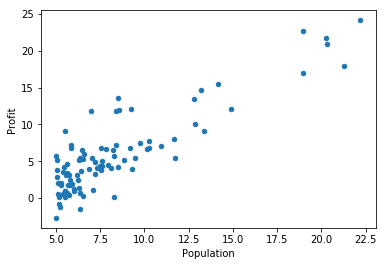

In [3]:
df.plot.scatter(x='Population',y='Profit')   # ploting a scatter plot using matplotlib to visulize the data better

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['Population'], df['Profit'], test_size=0.33, random_state=42) # splitting data in test[0.33] and train[0.67]

In [5]:
X_train=np.asarray(X_train) # converting series in array
y_train=np.asarray(y_train) # converting series in array
X_test=np.asarray(X_test) # converting series in array
y_test=np.asarray(y_test) # converting series in array

In [6]:
theta0=0    # initilizing parameter 0  
theta1=0    # initilizing paramter 1
alpha= 0.01  # setting learnig rate at 0.01
epochs=5000  # setting the epochs at 5000
m=len(X_train) # getting the total num of rows of data set of training data
for e in range (epochs): # running for 5000 epochs 
    error0=0   # setting error for paramter 0 to 0
    error1=0   # setting error for paramter 1 to 0
    for i in range (0,len(X_train)): #running inner loop for every row of training data 
        error0=error0+((theta0+theta1*X_train[i])-y_train[i])   # calculating error for paramter0
        error1=error1+(((theta0+theta1*X_train[i])-y_train[i])*X_train[i])  # calculating error for paramter0
    theta0=theta0-alpha*(1/m)*error0  #updating paramter 0 
    theta1=theta1-alpha*(1/m)*error1  #updating paramter 1

In [7]:
y=[] # list initialize
for i in range (0,len(X_test)):  # running for test data
    y.append(theta0+theta1*X_test[i])  # computing our hypothesis function and appending in a python list

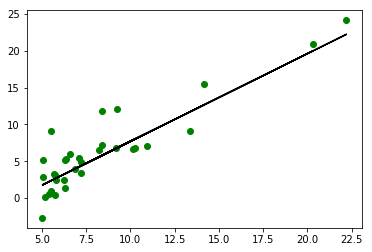

In [8]:
matplotlib.pyplot.scatter(X_test,y_test,color='g')  # representing the original data in green color
matplotlib.pyplot.plot(X_test,y,color='k')          # plotting our model prediction in black line

In [9]:
#computing the mean absolute error for Q1 
mae=0
n=len(y_test)
for i in range (0,n):
    mae=mae+abs(y_test[i]-y[i])
print(mae/n)

1.9392858858187776


In [10]:
#computing the mean square error for Q1 
mse=0
n=len(y_test)
for i in range (0,n):
    mse=mse+(y_test[i]-y[i])**2
print(mse/n)

6.406588422627


In [11]:
#computing the root mean square error for Q1 
rms=np.sqrt(mse/n)
print(rms)

2.531123944540646


# Q2

In [157]:
data = pd.read_csv('ex1data2.txt', header = None) # reading data in dataframe using pandas read csv function
data.columns = ["size", "bedroom","price"] # renaming columns just to add clarity

In [168]:
features=data[['size','bedroom']].copy()  # adding features to list
price=data['price'].copy()                # adding actual output to list
features=pd.DataFrame(features)           # reading features as a dataframe
features.insert(0, 'bias', 1)             # Adding bias term to make multiplication feasible 
price=np.asarray(price,dtype=np.float64)  # converting in numpy 
features=np.asarray(features,dtype=np.float64) # converting in numpy

In [169]:
mean_size=features[:,1].mean()  # calculating mean of size feature
std_size=features[:,1].std()    # calculating std of size feature
features[:,1] = features[:,1]-(mean_size) # normalizing feature size
features[:,1] =features[:,1]/ (std_size)  # normalizing feature size

mean_bed=features[:,2].mean()   # calculating mean of bedroom feature
std_bed=features[:,2].std()     # calculating std of bedroom feature
features[:,2] = features[:,2]- mean_bed # normalizing feature size
features[:,2] = features[:,2]/std_bed  # normalizing feature size
features1=np.transpose(features)   # taking transpose of our feature vector

In [170]:
X_train, X_test, y_train, y_test = train_test_split(features,price, test_size=0, random_state=40) # splitting data in test[0.33] and train[0.67]

In [171]:
X_train=np.asarray(X_train) # converting series in array
y_train=np.asarray(y_train) # converting series in array
X_test=np.asarray(X_test) # converting series in array
y_test=np.asarray(y_test) # converting series in array
XT=np.transpose(X_train)

In [172]:
total_features=2        # genralizing the number of fetaures . 
thetas=np.zeros(total_features+1) #making our paramters equal to the number of features 
alpha= 0.1     #learning rate 0.1
epochs=100   # epoch 1000
costs=[]   
epoch=[]
for e in range (epochs):
    epoch.append(e)  # appending epoches for visulization
    thetas=thetas-(alpha/len(y_train))*(np.dot(XT,(np.dot(X_train,thetas)-y_train))) # updating parameter values    
    temp=(np.dot(X_train,thetas)-y_train)  
    cost=(np.dot(np.transpose(temp),temp))/(2*len(y_train))
    costs.append(cost) # appending cost for visulization

matplotlib.pyplot.plot(epoch,costs,color='g')


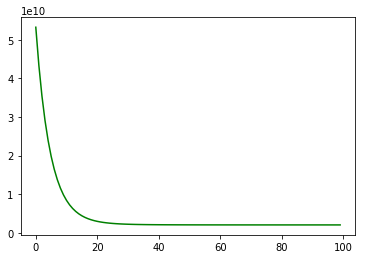

In [173]:
matplotlib.pyplot.plot(epoch,costs,color='g') # ploting cost against epochs

In [174]:
# predicting price of a house
def predict_price(size,bedroom):  
    return(np.round(thetas[0]*1+thetas[1]*size+thetas[2]*bedroom))

In [175]:
print(predict_price((1650-mean_size)/std_size,(3-mean_bed)/std_bed))

293214.0


In [166]:
y=[] # list initialize
for i in range (0,len(X_test)):  # running for test data
    y.append(thetas[0]*1+thetas[1]*X_test[:,1][i]+thetas[2]*X_test[:,2][i])  # computing our hypothesis function and appending in a python list

In [167]:
#computing the mean absolute error for Q1 
mae=0
n=len(y_test)
for i in range (0,n):
    mae=mae+abs(y_test[i]-y[i])
print(mae/n)

63290.709051657


# Q3

In [133]:
data = pd.read_csv('ex1data2.txt', header = None) # reading data in dataframe using pandas read csv function
data.columns = ["size", "bedroom","price"] # renaming columns just to add clarity

In [134]:
features=data[['size','bedroom']].copy()  # adding features to list
price=data[['price']].copy()                # adding actual output to list
features=pd.DataFrame(features)           # reading features as a dataframe
features.insert(0, 'bias', 1)             # Adding bias term to make multiplication feasible 
price=np.asarray(price)  # converting in numpy 
features=np.asarray(features) # converting in numpy

In [135]:
def get_theatas(features,price): # function for getting parameter values
    X=features
    y=price
    x_transpose = np.transpose(X)   
    thetas=np.linalg.pinv(np.mat(x_transpose)*np.mat(X))*x_transpose*y
    return thetas   

In [136]:
thetas=get_theatas(features,price) #getting values of thetas

In [137]:
# function for predicting price of bedroom
def predict_price(size,bedroom):
    return(np.round(thetas[0]*1+thetas[1]*size+thetas[2]*bedroom))

In [138]:
print(predict_price(1650,3))

[[293081.]]


In [139]:
y=[] # list initialize
for i in range (0,len(features)):  # running for test data
    y.append(thetas[0]*1+thetas[1]*features[:,1][i]+thetas[2]*features[:,2][i]) 


In [140]:
mae=0
n=len(features)
for i in range (0,n):
    mae=mae+abs(price[i]-y[i])
print(mae/n)

[[51502.76840574]]
